In [31]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [2]:
df = pd.read_csv('analytic.csv')
df.head(3)

,Unnamed: 0,VETERAN3,ALCDAY5,SLEPTIM1,ASTHMA3,X_AGE_G,SMOKE100,SMOKDAY2,SEX,X_HISPANC,...,INC4,INC5,INC6,INC7,BMICAT,UNDWT,OVWT,OBESE,EXERANY3,NOEXER
0,6,1,888,7,1,6,2.0,NaN,1,2,...,0,0,1,0,4,0,0,1,1,0
1,10,1,203,8,2,3,1.0,2.0,1,2,...,0,0,0,1,3,0,1,0,1,0
2,15,1,888,8,2,6,1.0,3.0,1,2,...,0,1,0,0,3,0,1,0,1,0


## Hypothesis

_**In Veterans, drinking alcohol is associated with sleep duration**_

## Linear Regression Assumptions

<img src="img/LRassumptions.png" width="600"/>

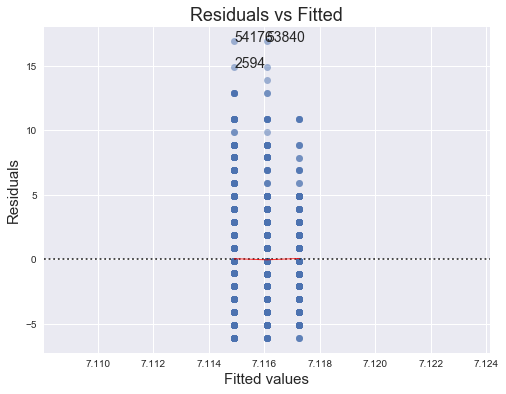

In [39]:
# these assumptions are to be met by data in order to perform linear regression
# We need two plots to confirm all four assumptions

model0 = ols("SLEPTIM2 ~ ALCGRP", data=df)
model_fit = model0.fit()
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# absolute residuals
model_abs_resid = np.abs(model_residuals)

plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(6)
plot_lm_1.set_figwidth(8)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'SLEPTIM2', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

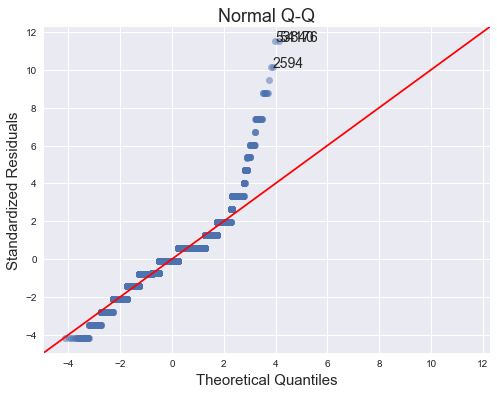

In [38]:
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(6)
plot_lm_2.set_figwidth(8)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

## Linear Regression

<img src="img/LR-Reporting.png" width="600"/>

### Model 1

In [6]:
model = ols("SLEPTIM2 ~ DRKMONTHLY + DRKWEEKLY", data=df)
results = model.fit()

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SLEPTIM2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.403
Date:                Sun, 10 Mar 2019   Prob (F-statistic):            0.00166
Time:                        17:12:56   Log-Likelihood:            -1.0482e+05
No. Observations:               58131   AIC:                         2.096e+05
Df Residuals:                   58128   BIC:                         2.097e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1487      0.015    469.869      0.000       7.119       7.178
DRKMONTHLY    -0.0584      0.018     -3.232      0.001      -0.094      -0.023
DRKWEEKLY     -0.0226      0.018     -1.274      0.203      -0.057       0.012
==============================================================================
Omnibus:                     9133.562   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75579.914
Skew:                           0.516   Prob(JB):                         0.00
Kurtosis:                       8.490   Cond. No.                         5.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ANOVA result: Prob (F-statistic):	0.00166 < 0.05
Since the ANOVA result is significant, we can go ahead and interpret the Linear Regression result.

For DRKMONTHLY,  p-value of t-statistic is 0.001 < 0.05. Therefore, it's significant.

For, DRKWEEKLY,  p-value of t-statistic is 0.203 > 0.05 making it not-significant.

### Model 2

In [9]:
model2 = ols("SLEPTIM2 ~ DRKMONTHLY + DRKWEEKLY + MALE + AGE2 + AGE3 + AGE4 + AGE5 + AGE6", data=df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SLEPTIM2   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     400.6
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:33:28   Log-Likelihood:            -1.0326e+05
No. Observations:               58131   AIC:                         2.065e+05
Df Residuals:                   58122   BIC:                         2.066e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5514      0.053    124.097      0.000       6.448       6.655
DRKMONTHLY    -0.0218      0.018     -1.235      0.217      -0.056       0.013
DRKWEEKLY     -0.0576      0.017     -3.331      0.001      -0.091      -0.024
MALE           0.0087      0.021      0.405      0.686      -0.033       0.051
AGE2          -0.0828      0.055     -1.500      0.133      -0.191       0.025
AGE3           0.0637      0.053      1.195      0.232      -0.041       0.168
AGE4           0.1772      0.051      3.485      0.000       0.078       0.277
AGE5           0.3846      0.050      7.743      0.000       0.287       0.482
AGE6           0.8616      0.048     17.788      0.000       0.767       0.957
==============================================================================
Omnibus:                    10265.434   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92951.489
Skew:                           0.589   Prob(JB):                         0.00
Kurtosis:                       9.082   Cond. No.                         32.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Keeping only the significant variables DRKWEEKLY, AGE4, AGE5, AGE6 as start point of final model.

### Model 3 - Forward stepwise regression

In [11]:
model3 = ols("SLEPTIM2 ~ DRKWEEKLY + AGE4 + AGE5 + AGE6", data=df)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SLEPTIM2   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     796.5
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:07:26   Log-Likelihood:            -1.0327e+05
No. Observations:               58131   AIC:                         2.066e+05
Df Residuals:                   58126   BIC:                         2.066e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5432      0.017    376.345      0.000       6.509       6.577
DRKWEEKLY     -0.0415      0.012     -3.465      0.001      -0.065      -0.018
AGE4           0.1768      0.024      7.222      0.000       0.129       0.225
AGE5           0.3847      0.022     17.572      0.000       0.342       0.428
AGE6           0.8626      0.019     46.117      0.000       0.826       0.899
==============================================================================
Omnibus:                    10252.687   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92930.124
Skew:                           0.588   Prob(JB):                         0.00
Kurtosis:                       9.082   Cond. No.                         7.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# adding SMOKER to the model above

model4 = ols("SLEPTIM2 ~ DRKWEEKLY + AGE4 + AGE5 + AGE6 + SMOKER", data=df)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SLEPTIM2   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     677.7
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:08:57   Log-Likelihood:            -1.0318e+05
No. Observations:               58131   AIC:                         2.064e+05
Df Residuals:                   58125   BIC:                         2.064e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5976      0.018    370.756      0.000       6.563       6.632
DRKWEEKLY     -0.0419      0.012     -3.501      0.000      -0.065      -0.018
AGE4           0.1760      0.024      7.202      0.000       0.128       0.224
AGE5           0.3833      0.022     17.540      0.000       0.340       0.426
AGE6           0.8297      0.019     44.077      0.000       0.793       0.867
SMOKER        -0.2358      0.017    -13.861      0.000      -0.269      -0.202
==============================================================================
Omnibus:                    10556.265   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95389.383
Skew:                           0.616   Prob(JB):                         0.00
Kurtosis:                       9.154   Cond. No.                         7.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Adding HISPANIC to the model above

model5 = ols("SLEPTIM2 ~ DRKWEEKLY + AGE4 + AGE5 + AGE6 + SMOKER + HISPANIC", data=df)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SLEPTIM2   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     568.2
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:14:00   Log-Likelihood:            -1.0317e+05
No. Observations:               58131   AIC:                         2.063e+05
Df Residuals:                   58124   BIC:                         2.064e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6107      0.018    366.468      0.000       6.575       6.646
DRKWEEKLY     -0.0408      0.012     -3.408      0.001      -0.064      -0.017
AGE4           0.1702      0.024      6.954      0.000       0.122       0.218
AGE5           0.3752      0.022     17.108      0.000       0.332       0.418
AGE6           0.8193      0.019     43.190      0.000       0.782       0.856
SMOKER        -0.2366      0.017    -13.911      0.000      -0.270      -0.203
HISPANIC      -0.1366      0.031     -4.425      0.000      -0.197      -0.076
==============================================================================
Omnibus:                    10570.160   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95527.759
Skew:                           0.617   Prob(JB):                         0.00
Kurtosis:                       9.158   Cond. No.                         8.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Adding Race variables

model6 = ols("""SLEPTIM2 ~ DRKWEEKLY + AGE4 + AGE5 + AGE6 
    + SMOKER + HISPANIC + BLACK + ASIAN + OTHRACE""", data=df)
results6 = model6.fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SLEPTIM2   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     400.0
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:14:13   Log-Likelihood:            -1.0308e+05
No. Observations:               58131   AIC:                         2.062e+05
Df Residuals:                   58121   BIC:                         2.063e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6551      0.018    363.379      0.000       6.619       6.691
DRKWEEKLY     -0.0292      0.012     -2.435      0.015      -0.053      -0.006
AGE4           0.1667      0.024      6.819      0.000       0.119       0.215
AGE5           0.3619      0.022     16.504      0.000       0.319       0.405
AGE6           0.7886      0.019     41.333      0.000       0.751       0.826
SMOKER        -0.2278      0.017    -13.399      0.000      -0.261      -0.195
HISPANIC      -0.1126      0.031     -3.612      0.000      -0.174      -0.052
BLACK         -0.2472      0.024    -10.369      0.000      -0.294      -0.200
ASIAN         -0.3393      0.061     -5.579      0.000      -0.458      -0.220
OTHRACE       -0.2009      0.026     -7.643      0.000      -0.252      -0.149
==============================================================================
Omnibus:                    10922.848   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99560.663
Skew:                           0.645   Prob(JB):                         0.00
Kurtosis:                       9.280   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

DRKWEEKLY got less significant here. Since it is our exposure variable, we are not removing it but should keep this in mind

In [17]:
# Adding marital status variables

model7 = ols("""SLEPTIM2 ~ DRKWEEKLY + AGE4 + AGE5 + AGE6 
    + SMOKER + HISPANIC + BLACK + ASIAN + OTHRACE + NEVERMAR + FORMERMAR""", data=df)
results7 = model7.fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SLEPTIM2   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     332.8
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:17:21   Log-Likelihood:            -1.0305e+05
No. Observations:               58131   AIC:                         2.061e+05
Df Residuals:                   58119   BIC:                         2.062e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6652      0.018    363.008      0.000       6.629       6.701
DRKWEEKLY     -0.0268      0.012     -2.241      0.025      -0.050      -0.003
AGE4           0.1715      0.024      7.011      0.000       0.124       0.219
AGE5           0.3685      0.022     16.763      0.000       0.325       0.412
AGE6           0.7965      0.019     41.371      0.000       0.759       0.834
SMOKER        -0.2151      0.017    -12.564      0.000      -0.249      -0.182
HISPANIC      -0.1099      0.031     -3.527      0.000      -0.171      -0.049
BLACK         -0.2317      0.024     -9.688      0.000      -0.279      -0.185
ASIAN         -0.3422      0.061     -5.629      0.000      -0.461      -0.223
OTHRACE       -0.1959      0.026     -7.454      0.000      -0.247      -0.144
NEVERMAR      -0.3057      0.046     -6.607      0.000      -0.396      -0.215
FORMERMAR     -0.0581      0.014     -4.266      0.000      -0.085      -0.031
==============================================================================
Omnibus:                    11071.402   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101195.690
Skew:                           0.657   Prob(JB):                         0.00
Kurtosis:                       9.329   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

DRKWEEKLY is still insignificant

In [18]:
# adding gen health variables

model8 = ols("""SLEPTIM2 ~ DRKWEEKLY + AGE4 + AGE5 + AGE6 + SMOKER + HISPANIC + BLACK 
+ ASIAN + OTHRACE + NEVERMAR + FORMERMAR + FAIRHLTH + POORHLTH""", data=df)
results8 = model8.fit()
results8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SLEPTIM2   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     291.8
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:20:07   Log-Likelihood:            -1.0299e+05
No. Observations:               58131   AIC:                         2.060e+05
Df Residuals:                   58117   BIC:                         2.061e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6639      0.018    363.191      0.000       6.628       6.700
DRKWEEKLY     -0.0059      0.012     -0.487      0.626      -0.030       0.018
AGE4           0.1820      0.024      7.444      0.000       0.134       0.230
AGE5           0.3918      0.022     17.761      0.000       0.349       0.435
AGE6           0.8201      0.019     42.387      0.000       0.782       0.858
SMOKER        -0.1970      0.017    -11.472      0.000      -0.231      -0.163
HISPANIC      -0.1015      0.031     -3.259      0.001      -0.163      -0.040
BLACK         -0.2244      0.024     -9.386      0.000      -0.271      -0.178
ASIAN         -0.3455      0.061     -5.689      0.000      -0.465      -0.226
OTHRACE       -0.1848      0.026     -7.032      0.000      -0.236      -0.133
NEVERMAR      -0.2852      0.046     -6.165      0.000      -0.376      -0.195
FORMERMAR     -0.0475      0.014     -3.485      0.000      -0.074      -0.021
FAIRHLTH      -0.1601      0.017     -9.332      0.000      -0.194      -0.127
POORHLTH      -0.1847      0.025     -7.336      0.000      -0.234      -0.135
==============================================================================
Omnibus:                    11671.948   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106189.153
Skew:                           0.709   Prob(JB):                         0.00
Kurtosis:                       9.467   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Adding health plan variables

model9 = ols("""SLEPTIM2 ~ DRKWEEKLY + AGE4 + AGE5 + AGE6 + SMOKER + HISPANIC + BLACK 
+ ASIAN + OTHRACE + NEVERMAR + FORMERMAR + FAIRHLTH + POORHLTH + NOPLAN""", data=df)
results9 = model9.fit()
results9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SLEPTIM2   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     270.9
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:21:14   Log-Likelihood:            -1.0299e+05
No. Observations:               58131   AIC:                         2.060e+05
Df Residuals:                   58116   BIC:                         2.061e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6643      0.018    360.274      0.000       6.628       6.701
DRKWEEKLY     -0.0059      0.012     -0.484      0.628      -0.030       0.018
AGE4           0.1819      0.024      7.439      0.000       0.134       0.230
AGE5           0.3916      0.022     17.733      0.000       0.348       0.435
AGE6           0.8197      0.020     42.028      0.000       0.781       0.858
SMOKER        -0.1968      0.017    -11.421      0.000      -0.231      -0.163
HISPANIC      -0.1015      0.031     -3.258      0.001      -0.163      -0.040
BLACK         -0.2244      0.024     -9.386      0.000      -0.271      -0.178
ASIAN         -0.3455      0.061     -5.689      0.000      -0.465      -0.226
OTHRACE       -0.1848      0.026     -7.032      0.000      -0.236      -0.133
NEVERMAR      -0.2851      0.046     -6.161      0.000      -0.376      -0.194
FORMERMAR     -0.0474      0.014     -3.473      0.001      -0.074      -0.021
FAIRHLTH      -0.1601      0.017     -9.329      0.000      -0.194      -0.126
POORHLTH      -0.1846      0.025     -7.334      0.000      -0.234      -0.135
NOPLAN        -0.0057      0.032     -0.181      0.856      -0.068       0.056
==============================================================================
Omnibus:                    11673.512   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106207.895
Skew:                           0.710   Prob(JB):                         0.00
Kurtosis:                       9.468   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NOPLAN variable is not significant. Therefore, won't consider it in next model

Similarly, by adding more and more variables and removing the insignificant ones, the 21st model will have all the significant variables considered. The details of the steps are documented in _Linear model metadata Complete.xlsx_. Here is the 21st model:

In [21]:
model21 = ols("""SLEPTIM2 ~ DRKWEEKLY + AGE4 + AGE5 + AGE6 
    + SMOKER + HISPANIC + BLACK + ASIAN + OTHRACE + NEVERMAR + FORMERMAR
    + FAIRHLTH + POORHLTH + SOMECOLL
    + INC2 + INC7 + OVWT + OBESE + AGE3 + LOWED""", data=df)
results21 = model21.fit()
results21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SLEPTIM2   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     195.1
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:33:22   Log-Likelihood:            -1.0294e+05
No. Observations:               58131   AIC:                         2.059e+05
Df Residuals:                   58110   BIC:                         2.061e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6788      0.028    241.002      0.000       6.625       6.733
DRKWEEKLY     -0.0069      0.012     -0.567      0.571      -0.031       0.017
AGE4           0.2612      0.030      8.719      0.000       0.202       0.320
AGE5           0.4706      0.028     16.787      0.000       0.416       0.526
AGE6           0.8847      0.026     34.068      0.000       0.834       0.936
SMOKER        -0.2087      0.017    -11.980      0.000      -0.243      -0.175
HISPANIC      -0.0968      0.031     -3.109      0.002      -0.158      -0.036
BLACK         -0.2201      0.024     -9.213      0.000      -0.267      -0.173
ASIAN         -0.3606      0.061     -5.937      0.000      -0.480      -0.242
OTHRACE       -0.1773      0.026     -6.746      0.000      -0.229      -0.126
NEVERMAR      -0.2830      0.046     -6.114      0.000      -0.374      -0.192
FORMERMAR     -0.0535      0.014     -3.887      0.000      -0.080      -0.026
FAIRHLTH      -0.1521      0.017     -8.784      0.000      -0.186      -0.118
POORHLTH      -0.1799      0.025     -7.090      0.000      -0.230      -0.130
SOMECOLL      -0.0272      0.015     -1.853      0.064      -0.056       0.002
INC2          -0.0748      0.032     -2.315      0.021      -0.138      -0.011
INC7          -0.0306      0.016     -1.913      0.056      -0.062       0.001
OVWT          -0.0816      0.015     -5.619      0.000      -0.110      -0.053
OBESE         -0.1326      0.016     -8.246      0.000      -0.164      -0.101
AGE3           0.1338      0.034      3.955      0.000       0.068       0.200
LOWED          0.0243      0.015      1.654      0.098      -0.004       0.053
==============================================================================
Omnibus:                    11715.471   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106684.683
Skew:                           0.713   Prob(JB):                         0.00
Kurtosis:                       9.482   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we will try to add the variables that got kicked out during the process and see if anyone of them fits. After trying all the kicked out variables, we will have our FINAL model!  The steps up to the final model are again mentioned in _Linear model metadata Complete.xlsx_ 

In [22]:
#add back NOEXER
#screws up LOWED
#remove NOEXER
#add back NOPLAN
#remove NOPLAN
#add back AGE2
#remove AGE2
#add back INC1
#remove INC1
#add back INC3
#remove INC3
#add back INC4
#remove INC4
#add back INC5
#remove INC5
#add back INC6
#remove INC6
#add back MALE

model31 = ols("""SLEPTIM2 ~ DRKWEEKLY + AGE3 + AGE4 + AGE5 + AGE6 
    + SMOKER + HISPANIC + BLACK + ASIAN + OTHRACE + NEVERMAR + FORMERMAR
    + FAIRHLTH + POORHLTH + LOWED + SOMECOLL
    + INC2 + INC7 + OVWT + OBESE + DRKMONTHLY""", data=df)
results31 = model31.fit()
results31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SLEPTIM2   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     185.8
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:40:37   Log-Likelihood:            -1.0293e+05
No. Observations:               58131   AIC:                         2.059e+05
Df Residuals:                   58109   BIC:                         2.061e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6901      0.031    219.054      0.000       6.630       6.750
DRKWEEKLY     -0.0178      0.017     -1.024      0.306      -0.052       0.016
AGE3           0.1339      0.034      3.956      0.000       0.068       0.200
AGE4           0.2607      0.030      8.703      0.000       0.202       0.319
AGE5           0.4702      0.028     16.766      0.000       0.415       0.525
AGE6           0.8841      0.026     34.031      0.000       0.833       0.935
SMOKER        -0.2087      0.017    -11.978      0.000      -0.243      -0.175
HISPANIC      -0.0970      0.031     -3.114      0.002      -0.158      -0.036
BLACK         -0.2202      0.024     -9.214      0.000      -0.267      -0.173
ASIAN         -0.3605      0.061     -5.935      0.000      -0.480      -0.241
OTHRACE       -0.1773      0.026     -6.745      0.000      -0.229      -0.126
NEVERMAR      -0.2830      0.046     -6.113      0.000      -0.374      -0.192
FORMERMAR     -0.0535      0.014     -3.893      0.000      -0.081      -0.027
FAIRHLTH      -0.1520      0.017     -8.776      0.000      -0.186      -0.118
POORHLTH      -0.1797      0.025     -7.083      0.000      -0.229      -0.130
LOWED          0.0242      0.015      1.649      0.099      -0.005       0.053
SOMECOLL      -0.0271      0.015     -1.850      0.064      -0.056       0.002
INC2          -0.0747      0.032     -2.313      0.021      -0.138      -0.011
INC7          -0.0306      0.016     -1.911      0.056      -0.062       0.001
OVWT          -0.0816      0.015     -5.616      0.000      -0.110      -0.053
OBESE         -0.1323      0.016     -8.221      0.000      -0.164      -0.101
DRKMONTHLY    -0.0154      0.018     -0.878      0.380      -0.050       0.019
==============================================================================
Omnibus:                    11719.331   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106745.873
Skew:                           0.713   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

DRKWEEKLY and DRKMONTHLY are not significant! Our hypothesis is NOT supported. Both the alcohol variables are not associated with sleep duration after adjusting confounders.